# Instructions

1.   For math exercises, use $\LaTeX$  to typset your answer
2.   For coding exercises, insert your code at `# TODO` statements
3.   For multiple-choice questions, choose an answer from the drop-down list
4.   Before submitting your notebook, **make sure that it runs without errors when executed from start to end on Colab**
  - To check this, reload your notebook and the Python kernel, and run the notebook from the first to the last cell

## Notebook Setup

In [1]:
# Imports [don't change this cell!]
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import sklearn
import string
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

# Set the random seed for reproducibility
RAND_SEED = 27
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)

In [2]:
# Your Imports [import any other libraries you need in this cell]
# download the stopwords from NLTK
import nltk    
nltk.download('stopwords')
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



<hr />

## Q1: Text Preprocessing [5 marks]

### Q1.1: Tokenisation [3 marks]
Create a function called `word_tokenize` to split input text into tokens separated by any whitespace character, or punctuation character (as listed in Python's `string.punctuation`).

For example, the following input:

`Pre-processing is useful to most NLP algorithms -- it allows us to transform text into a more digestible format for models.`

should be transformed into:

`['Pre', '-', 'processing', 'is', 'useful', 'to', 'most', 'NLP', 'algorithms', '-', '-', 'it', 'allows', 'us', 'to', 'transform', 'text', 'into', 'a', 'more', 'digestible', 'format', 'for', 'models', '.']`


In [38]:
#TODO: complete the function below
def word_tokenize(text: str) -> list:
    # instantiate tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                                   reduce_len=True)

    # tokenize tweets
    text_tokens = tokenizer.tokenize(text)
    
    return text_tokens  # TODO: you might need to change what the function returns

input_text = "Pre-processing is useful to most NLP algorithms -- it allows us to transform text into a more digestible format for models."
print(word_tokenize(input_text))

['pre-processing', 'is', 'useful', 'to', 'most', 'nlp', 'algorithms', '-', '-', 'it', 'allows', 'us', 'to', 'transform', 'text', 'into', 'a', 'more', 'digestible', 'format', 'for', 'models', '.']


### Q1.2: Remove stopwords [2 marks]
Create a function called `remove_stopwords` to remove the stopwords `['a', 'in', 'to', 'as', 'for', 'the']` from an input list of tokens.

For example, the following input:

`['Pre', '-', 'processing', 'is', 'useful', 'to', 'most', 'NLP', 'algorithms', '-', '-', 'it', 'allows', 'us', 'to', 'transform', 'text', 'into', 'a', 'more', 'digestible', 'format', 'for', 'models', '.']`

should be transformed into:

`['Pre', '-', 'processing', 'is', 'useful', 'most', 'NLP', 'algorithms', '-', '-', 'it', 'allows', 'us', 'transform', 'text', 'into', 'more', 'digestible', 'format', 'models', '.']`


In [39]:
#TODO: complete the function below
def remove_stopwords(tokens: list) -> list:
    #TODO: your code goes here
    #Import the english stop words list from NLTK
    stopwords_english = stopwords.words('english') 
    
    tokens_clean = []

    for word in tokens: # Go through every word in your tokens list
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            tokens_clean.append(word)

  
    
    return tokens_clean  # TODO: you might need to change what the function returns

input_tokens = ['Pre', '-', 'processing', 'is', 'useful', 'to', 'most', 'NLP', 'algorithms', '-', '-', 'it', 'allows', 'us', 'to', 'transform', 'text', 'into', 'a', 'more', 'digestible', 'format', 'for', 'models', '.']
print(remove_stopwords(input_tokens))

['Pre', 'processing', 'useful', 'NLP', 'algorithms', 'allows', 'us', 'transform', 'text', 'digestible', 'format', 'models']



<hr />

## Q2: Feature Exploration [20 marks]

In [67]:
# This cell loads the SST-2 dataset [do not change!]
path_train = "https://drive.google.com/uc?id=1IsO72aOzjx-6eu2Z5VOaXZBShatNxBaj"
path_dev = "https://drive.google.com/uc?id=1tUiTEzR14wmYTdr0mYEKaDbj9-pN05-u"

# Load in the train and dev data
df_train = pd.read_csv(path_train, sep='\t')
df_dev = pd.read_csv(path_dev, sep='\t')
# We'll split df_dev into a validation and test set for the purposes of this assignment
df_dev, df_test = df_dev[:400], df_dev[400:]

# Quick look at the training data
pd.set_option('max_colwidth', 1000)
df_train[:10]

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates something rather beautiful about human nature,1
3,remains utterly satisfied to remain the same throughout,0
4,on the worst revenge-of-the-nerds clichés the filmmakers could dredge up,0
5,that 's far too tragic to merit such superficial treatment,0
6,"demonstrates that the director of such hollywood blockbusters as patriot games can still turn out a small , personal film with an emotional wallop .",1
7,of saucy,1
8,a depressed fifteen-year-old 's suicidal poetry,0
9,are more deeply thought through than in most ` right-thinking ' films,1


### Q2.1: Distinguish "good" from "bad" [2 marks]
Create a function called `is_good` to identify whether either of the words `['good', 'nice', 'love']` occur in a text string. The function should return `1` if any of the words are present, and `0` otherwise. Make sure that you only match the complete words (for example, if the word `loves` occurs, the function should return `0`).

Create another function called `is_bad` to identify whether either of the words `['bad', 'ugly', 'boring']` occur in a text string. The function should return `1` if any of the words are present, and `0` otherwise.


In [6]:
#TODO: complete the function below
def is_good(text: str) -> int:
    #TODO: your code goes here
    splits = text.split() #So I can easily iterate over the sentence
    for split in splits:
        if split == "good" or split == "nice" or split == "love":
            return 1
    return 0  # TODO: you need to change what the function returns

input_text = "that loves its characters and communicates something rather beautiful about human nature"
print(input_text)
print(is_good(input_text))  # should print 0

input_text = "I love NLP"
print(input_text)
print(is_good(input_text))  # should print 1

that loves its characters and communicates something rather beautiful about human nature
0
I love NLP
1


In [7]:
#TODO: complete the function below
def is_bad(text: str) -> int:
    #TODO: your code goes here
    splits = text.split() #So I can easily iterate over the sentence
    for split in splits:
        if split == "bad" or split == "ugly" or split == "boring":
            return 1
    return 0  # TODO: you need to change what the function returns

input_text = "that loves its characters and communicates something rather beautiful about human nature"
print(input_text)
print(is_bad(input_text))  # should print 0

input_text = "lockdowns can be boring but learning NLP totally makes up for it"
print(input_text)
print(is_bad(input_text))  # should print 1

that loves its characters and communicates something rather beautiful about human nature
0
lockdowns can be boring but learning NLP totally makes up for it
1


 
### Q2.2: Logistic Regression [3 marks]
Train a Logistic Regression model (feel free to use scikit-learn) using the `is_good()` and `is_bad()` functions as features. For example, the input sentence `I love NLP` would be featurised as the vector `[1, 0]` since `is_good()` will return `1` and `is_bad()` will return 0.

Report your results (accuracy) on the training set and the validation set.

In [8]:
#TODO: your code goes here
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
        
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
  
    
    return h

""" Gradient Descent """
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    
    # get 'm', the number of rows in matrix x
    m = len(x)
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x , theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1/m * ( np.dot(y.T , np.log(h)) + np.dot((1-y).T , np.log(1-h)) )

        # update the weights theta
        theta = theta - alpha / m * ( np.dot( x.T , (h - y) ) )
        
   
    J = float(J)
    return J, theta

def extract_features(sentence):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l_good = is_good(sentence)
    word_l_bad = is_bad(sentence)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE ###
    
    # loop through each word in the list of words
    x[0,1] = word_l_good
    x[0,2] = word_l_bad
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x


train_x = df_train.iloc[: , 0]
train_y = df_train.iloc[: , 1]

""" Training the model """
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i])

# training labels corresponding to X
Y = (np.array(train_y)).reshape(67349 ,1)

print(X.shape)

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

(67349, 3)
The cost after training is 0.69314718.
The resulting vector of weights is [9e-08, 1e-08, -1e-08]


In [9]:
""" Test the model """

def predict_sentence(sentence, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(sentence)
    
    
    # make the prediction using x and theta
    y_pred = 𝑠𝑖𝑔𝑚𝑜𝑖𝑑(np.dot(𝐱 , theta))
    
    ### END CODE HERE ###
    
    return y_pred



In [10]:
# Run this cell to test your function
for sentence in ['hide new secretions from the parental units', 'contains no wit , only labored gags', 'that loves its characters and communicates something rather beautiful about human nature']:
    print( '%s -> %f' % (sentence, predict_sentence(sentence, theta)))    

hide new secretions from the parental units -> 0.500000
contains no wit , only labored gags -> 0.500000
that loves its characters and communicates something rather beautiful about human nature -> 0.500000


In [11]:
""" Validation set """
valid_x = df_dev.iloc[: , 0]
valid_y = df_dev.iloc[: , 1]

X = np.zeros((len(valid_x), 3))
for i in range(len(valid_x)):
    X[i, :]= extract_features(valid_x[i])

# training labels corresponding to X
Y = (np.array(valid_y)).reshape(400 ,1)

J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.69314718.
The resulting vector of weights is [3e-08, 3e-08, -2e-08]


In [12]:
# UNQ_C5 GRADED FUNCTION: test_logistic_regression
def test_logistic_regression(test_x, test_y, theta, predict_sentence=predict_sentence):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of sentences
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of sentences classified correctly) / (total # of sentences)
    """
    
    ### START CODE HERE ###
    
    # the list for storing predictions
    y_hat = []
    
    for sentence in test_x:
        # get the label prediction for the tweet
        y_pred = predict_sentence(sentence , theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append(0.0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    
    counter = 0
    for i in range(len(y_hat)):
        if test_y[i] == y_hat[i]:
            counter = counter + 1
            
    accuracy = counter/len(test_x)
            
    ### END CODE HERE ###
    
    return accuracy

In [13]:
""" Test the model """
test_x = df_test.iloc[: , 0]
test_y = df_test.iloc[: , 1]

#print(df_test.shape)

# training labels corresponding to X
Y = (np.array(test_y)).reshape(472 ,1)

tmp_accuracy = test_logistic_regression(test_x, Y, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy * 100:.4f}" , "%")

Logistic regression model's accuracy = 50.0000 %


### Q2.3: Develop your own features [5 marks]
Develop your own feature functions and use them to train a Logistic Regression model. Describe the intuition behind any of the features you create, and make sure to show explanations and code for all interesting features you come up with, even if they don't make it to the final feature selection you use to train your model.

Report your results (accuracy) on the training set and the validation set.

In [14]:
#TODO: your code goes here

valid_x = df_dev.iloc[: , 0]
valid_y = df_dev.iloc[: , 1]

train_x = df_train.iloc[: , 0]
train_y = df_train.iloc[: , 1]

print(train_x.shape , " " , train_y.shape)

test_x = df_test.iloc[: , 0]
test_y = df_test.iloc[: , 1]

print(test_x.shape , " " , test_y.shape)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

""" Bag of words method to extract features """
vectorizer = CountVectorizer()
train_x = vectorizer.fit_transform(train_x)
test_x = vectorizer.transform(test_x)
valid_x = vectorizer.transform(valid_x)

feature_names = vectorizer.get_feature_names()
print("Number of features {}".format(len(feature_names)))

print("First 20 features \n{}".format(feature_names[:20]))

""" Train Logistic Regression Model """
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x , train_y)
print("Training set score: {:.3f}".format(logreg.score(train_x , train_y)))
print("Validation set score: {:.3f}".format(logreg.score(valid_x , valid_y)))
print("Test set score: {:.3f}".format(logreg.score(test_x , test_y)))

(67349,)   (67349,)
(472,)   (472,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features 13774
First 20 features 
['000', '10', '100', '101', '103', '105', '10th', '11', '110', '112', '12', '120', '127', '129', '12th', '13', '13th', '14', '140', '146']
Training set score: 0.937
Validation set score: 0.828
Test set score: 0.807


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [15]:
""" Confusion Matrix for validation """
preds = logreg.predict(valid_x)
confusion = confusion_matrix(valid_y , preds)
print("Confusion Matrix: \n{}".format(confusion))

Confusion Matrix: 
[[152  40]
 [ 29 179]]


### Q2.4: TFIDF [2 marks]
Train a Logistic Regression model on the TFIDF representations of the input texts.

Report your results (accuracy) on the training set and the validation set.

In [16]:
#TODO: your code goes here
from sklearn.feature_extraction.text import TfidfVectorizer
train_x = df_train.iloc[: , 0]
train_y = df_train.iloc[: , 1]

print(train_x.shape , " " , train_y.shape)

test_x = df_test.iloc[: , 0]
test_y = df_test.iloc[: , 1]

print(test_x.shape , " " , test_y.shape)


valid_x = df_dev.iloc[: , 0]
valid_y = df_dev.iloc[: , 1]

text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

X_train_text = text_transformer.fit_transform(train_x)
X_test_text = text_transformer.transform(test_x)
X_valid_text = text_transformer.transform(valid_x)

(67349,)   (67349,)
(472,)   (472,)


In [17]:
X_train_text.shape, X_test_text.shape

from sklearn.model_selection import cross_val_score, StratifiedKFold

logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
cv_results = cross_val_score(logit, X_train_text, train_y , cv=skf, scoring='f1_micro')
cv_results, cv_results.mean()

(array([0.90987379, 0.9108389 , 0.91106162, 0.91618411, 0.91395055]),
 0.9123817958508258)

In [18]:
logit.fit(X_train_text, train_y)
test_preds = logit.predict(X_test_text)

In [19]:
""" Confusion Matrix for validation """
preds = logit.predict(X_valid_text)
confusion = confusion_matrix(valid_y , preds)
print("Confusion Matrix: \n{}".format(confusion))

Confusion Matrix: 
[[136  56]
 [ 34 174]]


In [20]:
""" Scores """

print("Training set score: {:.3f}".format(logit.score(X_train_text , train_y)))
print("Validation set score: {:.3f}".format(logit.score(X_valid_text , valid_y)))
print("Test set score: {:.3f}".format(logit.score(X_test_text , test_y)))

Training set score: 0.978
Validation set score: 0.775
Test set score: 0.786


### Q2.5: Error Analysis [8 marks]
Provide a descriptive error analysis comparing your best **feature engineered Logistic Regression model** to the **TFIDF Logistic Regression model**.

Make sure to include confusion matrices for both models on the **validation set** and an analysis of the error modes.

In [21]:
#TODO: your code goes here
"""Error analysis for feature engineered Logistic Regression model """

valid_x = df_dev.iloc[: , 0]
valid_y = df_dev.iloc[: , 1]

train_x = df_train.iloc[: , 0]

vectorizer = CountVectorizer()
train_x = vectorizer.fit_transform(train_x)
valid_x = vectorizer.transform(valid_x)

print('Label Predicted Sentence')
for x,y in zip(valid_x,valid_y):
    y_hat = logreg.predict(x)
    #print(x)
    #print('THE SENTENCE IS:', x)
    print('%d\t%0.2f' % (y, y_hat))

Label Predicted Sentence
1	1.00
0	0.00
1	1.00
1	1.00
0	0.00
1	1.00
0	0.00
0	0.00
1	1.00
0	0.00
1	1.00
0	0.00
0	0.00
1	1.00
0	0.00
1	1.00
1	1.00
1	1.00
0	0.00
0	0.00
0	0.00
0	0.00
0	1.00
1	1.00
1	1.00
0	0.00
0	0.00
1	1.00
0	0.00
0	0.00
1	1.00
0	1.00
1	1.00
0	1.00
0	0.00
0	0.00
1	1.00
0	1.00
1	1.00
1	1.00
1	1.00
1	1.00
1	0.00
1	1.00
0	0.00
0	1.00
0	0.00
1	1.00
1	1.00
0	0.00
0	0.00
1	1.00
1	1.00
1	1.00
0	0.00
1	1.00
0	0.00
0	0.00
0	1.00
0	0.00
1	1.00
0	0.00
1	0.00
1	1.00
0	1.00
0	0.00
1	0.00
1	1.00
1	1.00
0	0.00
0	0.00
1	1.00
1	1.00
1	0.00
0	0.00
1	1.00
0	0.00
1	1.00
1	1.00
0	0.00
1	1.00
0	0.00
0	1.00
1	1.00
1	1.00
1	1.00
0	0.00
1	1.00
1	0.00
1	0.00
1	1.00
1	1.00
0	1.00
1	0.00
1	1.00
0	1.00
0	1.00
1	1.00
0	0.00
0	0.00
1	0.00
0	0.00
1	1.00
1	1.00
1	1.00
0	0.00
1	1.00
0	1.00
0	0.00
1	1.00
0	1.00
0	1.00
1	0.00
0	0.00
1	1.00
0	0.00
1	1.00
1	1.00
0	1.00
0	0.00
1	1.00
0	0.00
1	1.00
1	1.00
1	0.00
1	1.00
0	0.00
0	0.00
1	1.00
1	1.00
0	0.00
0	1.00
1	1.00
0	1.00
0	0.00
0	1.00
0	0.00
0	0.00
1	1.00
0	

In [22]:
#TODO: your code goes here
"""Error analysis for TFIDF Logistic Regression model """

valid_x = df_dev.iloc[: , 0]
valid_y = df_dev.iloc[: , 1]

train_x = df_train.iloc[: , 0]

text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

X_train_text = text_transformer.fit_transform(train_x)
valid_x = text_transformer.transform(valid_x)

print('Label Predicted')
for x,y in zip(valid_x,valid_y):
    y_hat = logit.predict(x)
    print('%d\t%0.2f' % (y, y_hat))

Label Predicted
1	1.00
0	0.00
1	1.00
1	1.00
0	0.00
1	1.00
0	0.00
0	0.00
1	1.00
0	0.00
1	1.00
0	0.00
0	0.00
1	1.00
0	0.00
1	1.00
1	1.00
1	1.00
0	0.00
0	1.00
0	1.00
0	1.00
0	0.00
1	1.00
1	1.00
0	0.00
0	1.00
1	1.00
0	0.00
0	0.00
1	1.00
0	0.00
1	1.00
0	1.00
0	0.00
0	0.00
1	1.00
0	1.00
1	1.00
1	1.00
1	1.00
1	1.00
1	0.00
1	1.00
0	1.00
0	1.00
0	0.00
1	1.00
1	1.00
0	1.00
0	0.00
1	1.00
1	1.00
1	1.00
0	0.00
1	1.00
0	0.00
0	0.00
0	0.00
0	0.00
1	1.00
0	0.00
1	1.00
1	1.00
0	0.00
0	1.00
1	1.00
1	1.00
1	0.00
0	1.00
0	0.00
1	1.00
1	1.00
1	0.00
0	0.00
1	1.00
0	0.00
1	1.00
1	1.00
0	0.00
1	1.00
0	0.00
0	1.00
1	1.00
1	1.00
1	1.00
0	0.00
1	1.00
1	0.00
1	0.00
1	1.00
1	1.00
0	0.00
1	0.00
1	1.00
0	1.00
0	0.00
1	1.00
0	0.00
0	1.00
1	1.00
0	1.00
1	1.00
1	1.00
1	1.00
0	0.00
1	1.00
0	0.00
0	1.00
1	1.00
0	1.00
0	1.00
1	0.00
0	0.00
1	1.00
0	0.00
1	1.00
1	1.00
0	1.00
0	0.00
1	1.00
0	0.00
1	1.00
1	0.00
1	1.00
1	1.00
0	0.00
0	1.00
1	1.00
1	1.00
0	0.00
0	1.00
1	1.00
0	1.00
0	0.00
0	1.00
0	0.00
0	0.00
1	1.00
0	1.00
0	0.

TODO: your analysis goes here
It seems that the accuracy of feature engineered Logistic Regression model is higher than the accuracy of TFIDF Logistic Regression model


<hr />

## Q3: Define an NLP Problem [20 marks]

1. Write down the *problem statement*
1. Define the data *inputs* and *outputs*
1. What is the task structure? Is it similar to an existing NLP task you have heard of? If so, are there any sources of data you could use initially?
1. Design a **very quick** prototype of your idea for a **data annotation interface**. You can use tools such as:
    * Paper and pen
    * Spreadsheets (e.g. GSheets, Excel, etc)
    * Presentation software (e.g. GSlides, Powerpoint, Keynote, etc)
    * Rapid Prototyping apps (e.g. Adobe XD, [Mockplus](https://www.mockplus.com/free-wireframing-tool/), [Sketchappsources](https://www.sketchappsources.com/), etc)
    * Anything else!
    * **Make sure to upload your prototype interface somewhere that it can easily be shared and include a link to it in your description**
1. Briefly describe how you might approach modelling the problem

#### Q3.1: Problem Statement

Text summarization

#### Q3.2: Inputs and Outputs

Inputs will be a text
Output will be the summary of that text

#### Q3.3: Task Structure

1)Extraction of grammars
2)Extract the following:
    2.1)Terminology
    2.2)Thesaurus
    2.3)Lexicon
    2.4)Text segmentation into sentences

3)Semantic Analysis
4)Lexical Morphology
5)Information Evaluation
6)Summary Generation
7)Automatic Summary

#### Q3.4: Interface Prototype

In the spread file (the image)

#### Q3.5: Modelling Approach

Summarization is the restating of the main ideas of the text in as few words as possible
The two broad categories of approaches to text summarization are extraction and abstraction. 
1)Extractive methods select a subset of existing words, phrases, or sentences in the original text to form a summary.
2)Abstractive text summarization is a technique which creates a general summary and focuses on the important topics in the original document. Single document summarization method generates summaries of the text from a single document and multi document summarization technique produces summaries from multiple documents.



<hr />

## Q4: Be the Adversary [10 marks]
This question is designed to provide you with examples of the capabilities of state-of-the-art NLP models, as well as some intuition to how they work, and in particular where their weaknesses may lie.

### Adversarial Human Annotation for Reading Comprehension
#### Setup Instructions:
1. Access [Dynabench](https://dynabench.org/) (feel free to create an account to easily track your examples)
1. Navigate to "Tasks -> Question Answering -> Create Examples"
1. Try to beat the AI!

#### Your Challenge:
Try to **identify a pattern (or patterns) of weakness** that the model is susceptible to (feel free to use the "Inspect" button to see which passage tokens the model is giving most importance when answering the question). If you don't manage to identify any patterns in particular, provide a few examples of questions the model could not answer and the model predictions, and explain why you think the model might have found those examples challenging (based on your learnings so far).

Briefly describe your findings in the cell below.

-The weakness of the model is that it cannot answer the question that need one short answer
-Example of questions:
    1)how many Constituency members of parliament... 
    2)what is the rule of opposition politicians ? 


<hr />

## Q5: Text Similarity [15 marks]
For this question, we recommend using the `flair` library, although you may use any library of your choice as long as it runs properly within this notebook on Colab.

You will be given two sentences `She went for a walk in the park by the river bank` and `The woman went strolling on the grass next to the stream`, and asked to investigate the similarity between the two using different word embeddings.

In [23]:
# Install and use the flair library
# https://github.com/zalandoresearch/flair
try:
    
    import flair
    assert flair.__version__ == '0.8', f"flair version is {flair.__version__}"
except ModuleNotFoundError or AssertionError:
    !pip install flair==0.8.0
    !pip install allennlp==0.9.0
    import flair

from flair.data import Sentence
from flair.embeddings import WordEmbeddings, ELMoEmbeddings, TransformerWordEmbeddings, TransformerDocumentEmbeddings

     |████████████████████████████████| 277 kB 5.3 MB/s 
     |████████████████████████████████| 788 kB 50.3 MB/s 
     |████████████████████████████████| 1.2 MB 47.0 MB/s 
     |████████████████████████████████| 19.7 MB 180 kB/s 
     |████████████████████████████████| 981 kB 55.9 MB/s 
     |████████████████████████████████| 3.5 MB 37.3 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.8 MB 35.5 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.8 MB 41.2 MB/s 
     |████████████████████████████████| 596 kB 52.7 MB/s 
     |████████████████████████████████| 895 kB 58.8 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9692 sha256=0b090e7d174a230e0b5d46a080572f50f2fca7b617a

     |████████████████████████████████| 7.6 MB 5.3 MB/s 
     |████████████████████████████████| 592 kB 55.0 MB/s 
     |████████████████████████████████| 132 kB 61.9 MB/s 
     |████████████████████████████████| 5.8 MB 46.7 MB/s 
     |████████████████████████████████| 51 kB 7.3 MB/s 
     |████████████████████████████████| 235 kB 56.2 MB/s 
     |████████████████████████████████| 30.8 MB 80.4 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 123 kB 53.8 MB/s 
     |████████████████████████████████| 158 kB 56.2 MB/s 
     |████████████████████████████████| 124 kB 59.8 MB/s 
     |████████████████████████████████| 251 kB 71.2 MB/s 
     |████████████████████████████████| 138 kB 72.4 MB/s 
     |████████████████████████████████| 82 kB 418 kB/s 
     |████████████████████████████████| 3.2 MB 32.1 MB/s 
     |████████████████████████████████| 2.1 MB 38.5 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████

In [24]:
# Preparing the sentences [do not change!]
sentence_1 = "She went for a walk in the park by the river bank"
sentence_2 = "The woman went strolling on the grass next to the stream"

### Q5.1: Calculate Cosine Similarity [2 marks]
Create a function called `get_similarity` which calculates the cosine similarity between two word embeddings as a score between `0` and `1`. You may use any libraries you like to support this.


In [25]:
#TODO: complete the function below
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
def get_similarity(embedding_1:np.array, embedding_2:np.array) -> float:
  #TODO: your code goes here
    result = cosine_similarity(embedding_1.reshape(1,-1),embedding_2.reshape(1,-1))
    return result  # TODO: you need to change what the function returns

embedding_1 = np.array([1, 1, 1, 1, 0, 0])
embedding_2 = np.array([0, 1, 1, 0, 1, 0])
print(get_similarity(embedding_1, embedding_2))  # should print 0.57735...
print(get_similarity(embedding_2, embedding_1))  # should print 0.57735...

[[0.57735027]]
[[0.57735027]]


### Q5.2: Calculate the similarity between TFIDF representations [2 marks]
Obtain TFIDF representations for the two sentences (treat the collection of both sentences as your corpus). Calculate the cosine similarity between the two and store it in a variable called `similarity_tfidf`.


In [26]:
#TODO: your code goes here
corpus = [sentence_1 , sentence_2]

from sklearn.feature_extraction.text import TfidfVectorizer

LemVectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)


LemVectorizer.fit_transform(corpus)

tf_matrix = LemVectorizer.transform(corpus).toarray()
#print(tf_matrix)

embedding_1 = tf_matrix[0]
embedding_2 = tf_matrix[1]

similarity_tfidf = get_similarity(embedding_1 , embedding_2)
print(similarity_tfidf)

[[0.0595144]]


### Q5.3: Calculate the similarity between mean GloVe embeddings [2 marks]
Obtain GloVe embeddings for the two sentences (use the mean of the GloVe word embeddings as the sentence representations). Calculate the cosine similarity between the two and store it in a variable called `similarity_glove`.


In [120]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-02-19 14:28:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-02-19 14:28:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-02-19 14:28:57--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [121]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [122]:
#TODO: your code goes here

from gensim.scripts.glove2word2vec import glove2word2vec 
glove_input_file = 'glove.6B.300d.txt'
word2vec_output_file = 'word2vec.txt'

glove2word2vec(glove_input_file , word2vec_output_file)



(400000, 300)

In [123]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(word2vec_output_file , binary=False)


In [144]:
sentences = [sentence_1 , sentence_2]
tokenized_sent = []
for s in sentences:
    tokenized_sent.append(word_tokenize(s.lower()))

In [149]:



result = np.array(model.most_similar(positive=["went" , "walk" , "park" , "river" , "bank"]))
result2 = np.array(model.most_similar(positive=["woman" , "went" , "strolling" , "grass" , "stream"]  , topn=1))

embedding_1 = np.array([0.6405052542686462 , 0.6118150949478149 , 0.6045982837677002 , 0.5978922247886658 , 0.588208794593811
                         , 0.5794795751571655 , 0.5702369213104248 , 0.5641746520996094 , 0.562073826789856 , 0.5609502792358398])
embedding_2 = np.array([0.630841851234436 , 0 , 0 , 0 , 0
                         , 0 , 0 , 0 , 0 , 0])

similarity_glove = get_similarity(embedding_1, embedding_2)
print(similarity_glove)

[[0.34416768]]


### Q5.4: Calculate the similarity between mean ELMo embeddings [2 marks]
Obtain ELMo embeddings (use the `small` version in `flair`) for the two sentences (use the mean of the ELMo word embeddings as the sentence representations). Calculate the cosine similarity between the two and store it in a variable called `similarity_elmo`.


In [27]:
from allennlp.commands.elmo import ElmoEmbedder
import numpy as np

sentences = [sentence_1 , sentence_2]

max_tokens = 60
elmo = ElmoEmbedder()

embeddings = []
for index, elmo_embedding in enumerate(elmo.embed_sentences(sentences)):
  avg_elmo_embedding = np.average(elmo_embedding , axis=0)
  padding_length = max_tokens - avg_elmo_embedding.shape[0]
  if padding_length > 0:
    avg_elmo_embedding = np.append(avg_elmo_embedding , np.zeros((padding_length , avg_elmo_embedding.shape[1])) , axis=0)
  else:
    avg_elmo_embedding = avg_elmo_embedding[:max_tokens]
  embeddings.append(avg_elmo_embedding)

print(embeddings)


100%|██████████| 374434792/374434792 [00:16<00:00, 22131467.73B/s]


[array([[-0.68619967, -1.17717803, -1.0070529 , ..., -0.25718057,
         0.05153045, -0.26661763],
       [-0.513937  , -0.7289117 , -0.70272607, ...,  0.12641127,
         0.4333705 , -0.09313244],
       [-0.14983232, -0.48410884, -0.03351888, ..., -0.32853404,
         0.07449255, -0.28917411],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), array([[-0.62302196, -0.49806282, -0.94685084, ..., -0.05928332,
        -0.50392717, -0.32311997],
       [-0.50929123, -0.87861139, -0.49654627, ...,  0.03323149,
         0.42396483, -0.14164245],
       [-0.09726854, -0.07901293, -0.13162951, ..., -0.40328351,
         0.17622717, -0.32663617],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        

In [28]:
len(embeddings)

2

In [29]:
embedding_1 = embeddings[0]
embedding_2 = embeddings[1]

similarity_tfidf = get_similarity(embedding_1 , embedding_2)
print(similarity_tfidf)

[[0.57620455]]


### Q5.5: Calculate the similarity between BERT document embeddings [2 marks]
Obtain BERT **document** embeddings (use the `bert-base-uncased` model) for the two sentences (note that we are no longer doing mean pooling for this question). Calculate the cosine similarity between the two and store it in a variable called `similarity_bert`.


In [30]:
!pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 3.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=e115e94b433efe91f785c45fd0abb64788af3fcc4f9b6e9dd2caeb7516bf5da7
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers


In [31]:
#TODO: your code goes here

from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('bert-base-nli-mean-tokens')

sentences = [sentence_1 , sentence_2]

text_embeddings = model.encode(sentences, batch_size = 8, show_progress_bar = True)
print(np.shape(text_embeddings))

embedding_1 = text_embeddings[0]
embedding_2 = text_embeddings[1]

similarity_bert = get_similarity(embedding_1, embedding_2)
print(similarity_bert)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(2, 768)
[[0.7830601]]


### Q5.6: Analysis [5 marks]
Experiment with different sentences. Compare and contrast - for example, what can you say about comparing similarities when using different representations? What about when using the same representation type (e.g. GloVe) but using different sentences? If you had to build a text similarity system, what would you propose using?

Report on your findings below.

The different representations I used to represent a sentence show that BERT , and Elmo representations are better than Tf-IDF and glove as Elmo and BERT are above 0.5 but Tf-IDF and glove is less than 0.5




<hr />

## Q6: Modelling in PyTorch [20 marks]
Put your knowledge to the test! Implement an MLP in any ML library (we'd recommend PyTorch - refer to the lecture slides) on the SST-2 dataset which is already loaded into this notebook (refer to question 2).

### Your tasks include:
1. Optimize your model for best performance on the validation set
1. Show a plot of your model training and validation loss during training
1. Show a plot of your model training and validation accuracy during training
1. Explain where you might want to stop the model training and why
1. Provide your model's best accuracy on the test set
1. Perform an error analysis and compare to the models investigated in **question 2**

Make sure to explain the steps you went through and your observations.

In [36]:
def removeHyperLinks(sentence):
  # remove old style retweet text "RT"
  sentence2 = re.sub(r'^RT[\s]+', '', sentence)

  # remove hyperlinks
  sentence2 = re.sub(r'https?://[^\s\n\r]+', '', sentence2)

  # remove hashtags
  # only removing the hash # sign from the word
  sentence2 = re.sub(r'#', '', sentence2)

  return sentence2

In [40]:
def stemming(sentence_clean):
  # Instantiate stemming class
  stemmer = PorterStemmer() 

  # Create an empty list to store the stems
  sentences_stem = [] 

  for word in sentence_clean:
      stem_word = stemmer.stem(word)  # stemming word
      sentences_stem.append(stem_word)  # append to the list

  
  return sentences_stem

In [41]:
def process_sentence(sentence):
    sentence2 = removeHyperLinks(sentence)
    tokens = word_tokenize(sentence2)
    tokens_clean = remove_stopwords(tokens) 
    sentences_stem = stemming(tokens_clean)

    return sentences_stem

In [60]:
import tensorflow as tf
from tensorflow import keras
import torch

In [68]:
#TODO: your code goes here

df_train["sentence"]

0                                                        hide new secretions from the parental units 
1                                                                contains no wit , only labored gags 
2           that loves its characters and communicates something rather beautiful about human nature 
3                                            remains utterly satisfied to remain the same throughout 
4                           on the worst revenge-of-the-nerds clichés the filmmakers could dredge up 
                                                     ...                                             
67344                                                                            a delightful comedy 
67345                                                                anguish , anger and frustration 
67346                              at achieving the modest , crowd-pleasing goals it sets for itself 
67347                                                                             

In [78]:
df_dev["sentence"]

0                                                                             it 's a charming and often affecting journey . 
1                                                                                          unflinchingly bleak and desperate 
2                  allows us to hope that nolan is poised to embark a major career as a commercial yet inventive filmmaker . 
3      the acting , costumes , music , cinematography and sound are all astounding given the production 's austere locales . 
4                                                                                           it 's slow -- very , very slow . 
                                                                ...                                                          
395                         another in-your-face wallow in the lower depths made by people who have never sung those blues . 
396                                                                      a very well-made , funny and entertaining pic

In [79]:
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

# https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate/34294022
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

string.punctuation

pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df_train.sentence:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break


pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df_dev.sentence:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

In [80]:
df_train["sentence"] = df_train.sentence.map(remove_URL) # map(lambda x: remove_URL(x))
df_train["sentence"] = df_train.sentence.map(remove_punct)

In [81]:
df_dev["sentence"] = df_dev.sentence.map(remove_URL) # map(lambda x: remove_URL(x))
df_dev["sentence"] = df_dev.sentence.map(remove_punct)

In [108]:
df_test["sentence"] = df_test.sentence.map(remove_URL) # map(lambda x: remove_URL(x))
df_test["sentence"] = df_test.sentence.map(remove_punct)

In [82]:
stop = set(stopwords.words("english"))

# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [109]:
df_train["sentence"] = df_train.sentence.map(remove_stopwords)
df_dev["sentence"] = df_dev.sentence.map(remove_stopwords)
df_test["sentence"] = df_test.sentence.map(remove_stopwords)

In [110]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df_train.sentence)
counter2 = counter_word(df_dev.sentence)
counter4 = counter_word(df_test.sentence)

In [86]:
counter.most_common(5)


[('film', 4038), ('movie', 3563), ('nt', 2311), ('one', 2031), ('like', 1782)]

In [87]:
counter2.most_common(5)

[('movie', 50), ('film', 46), ('nt', 34), ('like', 26), ('characters', 23)]

In [111]:
counter4.most_common(5)

[('film', 75), ('movie', 43), ('nt', 38), ('one', 29), ('like', 27)]

In [88]:
num_unique_words = len(counter)

In [89]:
num_unique_words2 = len(counter2)

In [112]:
num_unique_words3 = len(counter4)

In [90]:
train_sentences = df_train.sentence.to_numpy()
train_labels = df_train.label.to_numpy()
val_sentences = df_dev.sentence.to_numpy()
val_labels = df_dev.label.to_numpy()

In [113]:
test_sentences = df_test.sentence.to_numpy()
test_labels = df_test.label.to_numpy()

In [91]:
train_sentences.shape, val_sentences.shape

((67349,), (400,))

In [92]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [93]:
# each word has unique index
word_index = tokenizer.word_index

In [114]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)
test_sequenes = tokenizer.texts_to_sequences(test_sentences)

In [95]:
print(train_sentences[10:15])
print(train_sequences[10:15])

['goes absurd lengths'
 'moviegoers complain nt make movies like used anymore'
 'part nothing happening' 'saw bad movie' 'lend dignity dumb story']
[[220, 1278, 4617], [1192, 8827, 3, 20, 26, 5, 908, 5836], [155, 53, 1593], [1193, 14, 2], [7098, 1466, 289, 6]]


In [96]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((67349, 20), (400, 20))

In [115]:
test_padded = pad_sequences(test_sequenes, maxlen=max_length, padding="post", truncating="post")

In [97]:
# Check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [98]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [99]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[220, 1278, 4617]
goes absurd lengths


In [100]:
# Create LSTM model
from tensorflow.keras import layers

# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# Word embeddings give us a way to use an efficient, dense representation in which similar words have 
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a 
# dense vector of floating point values (the length of the vector is a parameter you specify).

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

# The layer will take as input an integer matrix of size (batch, input_length),
# and the largest integer (i.e. word index) in the input should be no larger than num_words (vocabulary size).
# Now model.output_shape is (None, input_length, 32), where `None` is the batch dimension.


model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            466272    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 491,169
Trainable params: 491,169
Non-trainable params: 0
_________________________________________________________________


In [101]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [103]:
history = model.fit(train_padded, train_labels, epochs=20, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/20
2105/2105 - 51s - loss: 0.0905 - accuracy: 0.9631 - val_loss: 0.9875 - val_accuracy: 0.7825 - 51s/epoch - 24ms/step
Epoch 2/20
2105/2105 - 37s - loss: 0.0827 - accuracy: 0.9658 - val_loss: 0.8922 - val_accuracy: 0.7875 - 37s/epoch - 18ms/step
Epoch 3/20
2105/2105 - 37s - loss: 0.0759 - accuracy: 0.9679 - val_loss: 0.9421 - val_accuracy: 0.7775 - 37s/epoch - 18ms/step
Epoch 4/20
2105/2105 - 39s - loss: 0.0722 - accuracy: 0.9695 - val_loss: 1.2795 - val_accuracy: 0.7750 - 39s/epoch - 19ms/step
Epoch 5/20
2105/2105 - 37s - loss: 0.0676 - accuracy: 0.9713 - val_loss: 1.1482 - val_accuracy: 0.7775 - 37s/epoch - 17ms/step
Epoch 6/20
2105/2105 - 37s - loss: 0.0633 - accuracy: 0.9728 - val_loss: 1.0914 - val_accuracy: 0.7750 - 37s/epoch - 17ms/step
Epoch 7/20
2105/2105 - 36s - loss: 0.0611 - accuracy: 0.9734 - val_loss: 1.2431 - val_accuracy: 0.7550 - 36s/epoch - 17ms/step
Epoch 8/20
2105/2105 - 36s - loss: 0.0566 - accuracy: 0.9751 - val_loss: 1.4885 - val_accuracy: 0.7650 - 36s/ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


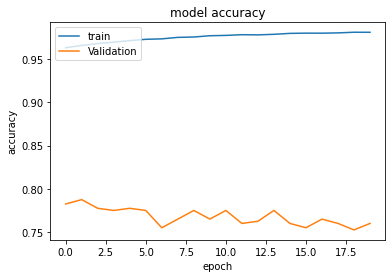

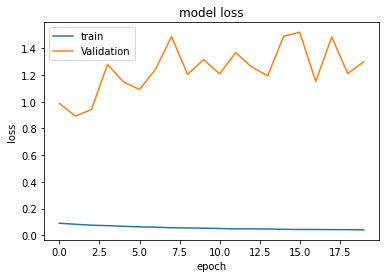

In [104]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [105]:
predictions = model.predict(val_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

In [106]:
print(train_sentences[10:20])

print(train_labels[10:20])
print(predictions[10:20])

['goes absurd lengths'
 'moviegoers complain nt make movies like used anymore'
 'part nothing happening' 'saw bad movie' 'lend dignity dumb story'
 'greatest musicians' 'cold movie' 'usual intelligence subtlety'
 'redundant concept'
 'swimming young woman face casting actress whose face projects woman doubts yearnings succeeds']
[0 0 0 0 0 1 0 1 0 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 0]


In [107]:
counter3 = 0
for i in range(len(predictions)):
  if predictions[i] == val_labels[i]:
    counter3 = counter3 + 1

print(counter3/len(predictions))

0.76


Explain where you might want to stop the model training and why?
When I found that the loss is as little as possible, so the accuracy will be high


In [116]:
predictions = model.predict(test_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

In [117]:

counter3 = 0
for i in range(len(predictions)):
  if predictions[i] == test_labels[i]:
    counter3 = counter3 + 1

print(counter3/len(predictions))

0.777542372881356


In [119]:
""" Error Analysis """
print('Label Predicted')
for i in range(len(predictions)):
  print(predictions[i] , '\t' , test_labels[i])

Label Predicted
1 	 1
1 	 1
1 	 0
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
0 	 1
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
1 	 0
0 	 1
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
0 	 0
0 	 1
0 	 0
0 	 1
1 	 1
1 	 0
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
0 	 0
0 	 1
0 	 0
1 	 1
0 	 1
1 	 1
0 	 0
1 	 1
0 	 0
0 	 1
1 	 1
0 	 0
1 	 1
1 	 0
1 	 0
0 	 0
1 	 1
0 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
1 	 0
1 	 1
0 	 0
0 	 0
0 	 0
1 	 1
0 	 0
1 	 0
0 	 1
0 	 1
0 	 0
1 	 1
0 	 1
1 	 0
1 	 1
0 	 0
0 	 0
1 	 1
0 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
1 	 0
1 	 1
0 	 0
0 	 0
0 	 1
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 0
1 	 0
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
1 	 0
1 	 1
1 	 1
1 	 0
0 	 0
1 	 0
1 	 0
0 	 1
0 	 0
1 	 0
0 	 0
0 	 0
1 	 0
0 	 0
0 	 1
0 	 0
0 	 0
0 	 0
1 	 1
1 	 1
1 	 0
0 	 0
0 	 1
0 	 0
1 	 1


It seems that this model is less in accuracy compared to the other models in question 2



<hr />

## Q7: Multiple Choice Quiz [10 points]

Answer the following questions by selecting the correct answer:

1. What is the Bag-of-Words (BOW) representation of the sentence `I love NLP` given the vocab defined by the tokens `['OOV', 'a', 'I', 'must', 'love']`?
2. What is the seventy-fourth element (index `73`) of the GloVe 6B 100-dimensional word embedding for `language`?
3. You are collecting data for a sentiment classification task. You've asked two expert workers to classify `20` sentences. Both workers agree on `11` positive examples and `4` negative examples. However, **worker A** labels `3` examples positive that **worker B** considered negative, while **worker B** labels `2` examples positive that **worker A** considered negative. What is the value of Cohen's Kappa?
4. In the sentence `I am enjoying this Natural Language Processing assignment`, what type of phrase is `am enjoying`?
5. Which of the following is **not** an example of an **activation function**?
6. What is the purpose of retaining a **held-out test set**?
7. What is the value of the gradient at the steepest point on a **logistic sigmoid curve**?
8. What probability will a non-OOV aware Uniform Language Model assign to the word `NLP` if it's vocabulary consists of the words `['NLP', 'is', 'so', 'intriguing']`?
9. Gradients in a neural network can sometimes be unstable and **vanish** or **explode**. Which of the following is an example of a reasonable way to deal with **exploding gradients**?
10. Which of the following is **not** an example of an **objective (or loss) function**?

In [150]:
#@title Answers { run: "auto" }
Q1 = "[0, 0, 1, 0, 1]" #@param ["Please select..", "[1, 0, 1, 0, 1]", "[0, 0, 1, 0, 1]", "[1, 0, 1]", "[1, 1, 1]", "[0, 0, 0, 1]", "None of the above"]
Q2 = "None of the above" #@param ["Please select..", "-0.04817", "0.89017", "-0.10938", "0.46719", "-0.39014", "None of the above"]
Q3 = "0.432" #@param ["Please select..", "0.390", "0.432", "0.500", "0.709", "0.782", "None of the above"]
Q4 = "Noun Phrase (NP)" #@param ["Please select..", "Noun Phrase (NP)", "Verb Phrase (VP)", "Prepositional Phrase (PP)", "Determiner (Det)", "Parse Tree", "None of the above"]
Q5 = "ELU" #@param ["Please select..", "Sigmoid", "ReLU", "Tanh", "Leaky ReLU", "ELU", "None of the above"]
Q6 = "To enable cross-validation" #@param ["Please select..", "To allow us to tune hyper-parameters", "To train on if we don't have enough data", "To enable cross-validation", "To be able to show loss plots", "To estimate the model's generalisation capability", "None of the above"]
Q7 = "0.1" #@param ["Please select..", "0.1", "0.25", "0.5", "0.75", "1.0", "None of the above"]
Q8 = "0.75" #@param ["Please select..", "0.1", "0.25", "0.5", "0.75", "1.0", "None of the above"]
Q9 = "LSTMs" #@param ["Please select..", "Backpropagation Through Time (BPTT)", "Gradient clipping", "Dropout", "Re-initialisation", "LSTMs", "None of the above"]
Q10 = "Hinge loss" #@param ["Please select..", "Mean Squared Error (MSE) loss", "Exponential loss", "Indefinite loss", "Hinge loss", "Cross-entropy loss", "None of the above"]